In [458]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# from pylab import rcParams

from scipy.stats import (pearsonr, spearmanr, kendalltau)

sb.set_style('darkgrid')
# rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

DEBUG = False

In [459]:
np.random.seed(12321)
source = pd.read_csv("train.csv").sample(frac=1).reset_index(drop=True)
source if DEBUG else None

In [460]:
if DEBUG:
    n_bins = 30
    for column in source.columns:
        plt.hist(source[column], n_bins)
        plt.title(column)
        plt.show()

In [461]:
def fill_na_values(df, column):
    avg = df[column].mean()
    std = df[column].std()
    df[column].fillna(np.random.normal(avg, std), inplace=True)

In [462]:
for column in source.columns:
    if source[column].dtype != object:
        fill_na_values(source, column)

In [463]:
def test(dataframe: pd.DataFrame, column1, column2='target'):
    ok = True
    
    stat, p = pearsonr(np.array(dataframe.loc[:, column1]).flatten(),
                       np.array(dataframe.loc[:, column2]).flatten())
    if DEBUG:
        print("Pearson's")
        print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        if DEBUG:
            print('Probably independent')
        ok = False
    else:
        if DEBUG:
            print('Probably dependent')
    if DEBUG:
        print()

    stat, p = spearmanr(np.array(dataframe.loc[:, column1]).flatten(),
                        np.array(dataframe.loc[:, column2]).flatten())
    if DEBUG:
        print("Spearman's")
        print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        if DEBUG:
            print('Probably independent')
        ok = False
    else:
        if DEBUG:
            print('Probably dependent')
    if DEBUG:
        print()

    stat, p = kendalltau(np.array(dataframe.loc[:, column1]).flatten(),
                         np.array(dataframe.loc[:, column2]).flatten())
    if DEBUG:
        print("Kendall's")
        print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        if DEBUG:
            print('Probably independent')
        ok = False
    else:
        if DEBUG:
            print('Probably dependent')
    if DEBUG:
        print()

    return ok

In [464]:
if DEBUG:
    for column in source.columns:
        if source.loc[:, column].dtype != object:
            print('-'*25)
            print(column)
            print(test(source, column, "target"))
    print('-'*25)
    print("Done")

In [465]:
dependent_columns = source.columns # np.array([column for column in source.columns if test(source, column, "target")])
# if DEBUG:
print(dependent_columns)
print(len(dependent_columns))

Index(['Id', 'Week', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8',
       'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18',
       'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'target'],
      dtype='object')
52


In [466]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [467]:
independent_columns = set(source.columns).difference(dependent_columns)
independent_columns

set()

In [468]:
train, test = source[:int(0.9 * len(source))], source[int(0.9 * len(source)):]
y = train['target']
x = train.drop(columns=[*independent_columns, 'Id', 'target'], axis=1)#you will use this for predicting and submitting the resulting
test_y = test['target']
test = test.drop(columns=[*independent_columns, 'Id', 'target'], axis=1)
print(x.columns)
if DEBUG:
    print(x.shape)
    print(y.shape)
    print(test.shape)

Index(['Week', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27'],
      dtype='object')


In [469]:
# X_train, X_test, y_train, y_test = train_test_split(x, y,
#                                                     test_size=0.2,
#                                                     random_state=1)
# if DEBUG:
#     print(X_train.shape)
#     print(y_train.shape)
    
#     print(X_test.shape)
#     print(y_test.shape)

In [470]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
#                                                   test_size=0.5,
#                                                   random_state=1)

In [471]:
# if DEBUG:
#     print("train")
#     print(X_train.shape)
#     print(y_train.shape)
#     print("-" * 25)
#     print("test")
#     print(X_test.shape)
#     print(y_test.shape)
#     print("-" * 25)
#     print("validation")
#     print(X_val.shape)
#     print(y_val.shape)

In [472]:
num_cols = list(set(dependent_columns).difference(['Id', 'target']))
num_cols if DEBUG else None

In [473]:
scaler = StandardScaler()

In [474]:
x[num_cols] = scaler.fit_transform(x[num_cols])
x.head() if DEBUG else None

In [475]:
# X_test[num_cols] = scaler.transform(X_test[num_cols])
# X_test.head() if DEBUG else None

In [476]:
# test[num_cols] = scaler.transform(test[num_cols])
# test.head() if DEBUG else None

In [477]:
# X_val[num_cols] = scaler.transform(X_val[num_cols])
# X_val.head() if DEBUG else None

In [478]:
# rand = RandomForestClassifier(bootstrap=True,
#                               criterion="gini",
#                               n_jobs=-1,
#                               max_depth=7,
#                               n_estimators=200,
#                               random_state=1,
#                               verbose=True)

In [479]:
# randmodel = rand.fit(X_train,y_train)

In [480]:
# randpred = randmodel.predict(test)

In [481]:
# print("Accuracy")
# accuracy_score(test_y, randpred)

In [482]:
# print("Recall")
# recall_score(test_y, randpred)

In [483]:
# print("F1 Score")
# f1_score(test_y, randpred)

In [484]:
# print("ROC score")
# roc_auc_score(test_y, randpred)

In [485]:
# confusion_matrix(test_y, randpred)

In [486]:
# type(randpred)

In [487]:
# n_bins = 30
# plt.hist(randpred, n_bins)
# plt.show()

In [488]:
# X_train.columns

In [489]:
x.columns

Index(['Week', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27'],
      dtype='object')

In [492]:
# x = submit.drop(columns=independent_columns, axis=1)

In [493]:
# randpred = randmodel.predict(x)

In [494]:
# n_bins = 30
# plt.hist(randpred, n_bins)
# plt.show()

In [495]:
import tensorflow as tf

In [623]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(150, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [624]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

In [625]:
y.to_numpy()*2 - 1


array([-1.,  1.,  1., ..., -1., -1.,  1.])

In [626]:
model.fit(x, y, epochs=40, batch_size=32)

Epoch 1/40
868/868 [==============================] - 6s 5ms/step - loss: 0.3420 - auc: 0.8461
Epoch 2/40
868/868 [==============================] - 5s 5ms/step - loss: 0.3034 - auc: 0.8837
Epoch 3/40
868/868 [==============================] - 5s 5ms/step - loss: 0.2940 - auc: 0.8923
Epoch 4/40
868/868 [==============================] - 5s 6ms/step - loss: 0.2881 - auc: 0.8971
Epoch 5/40
868/868 [==============================] - 5s 5ms/step - loss: 0.2848 - auc: 0.9024
Epoch 6/40
868/868 [==============================] - 6s 7ms/step - loss: 0.2811 - auc: 0.9043
Epoch 7/40
868/868 [==============================] - 5s 6ms/step - loss: 0.2745 - auc: 0.9078
Epoch 8/40
868/868 [==============================] - 3s 4ms/step - loss: 0.2729 - auc: 0.9099
Epoch 9/40
868/868 [==============================] - 3s 3ms/step - loss: 0.2729 - auc: 0.9093
Epoch 10/40
868/868 [==============================] - 3s 3ms/step - loss: 0.2686 - auc: 0.9123
Epoch 11/40
868/868 [============================

In [627]:
submit = pd.read_csv("test.csv")

In [628]:
for column in submit.columns:
    if submit[column].dtype != object:
        fill_na_values(submit, column)

In [629]:
submit[num_cols] = scaler.transform(submit[num_cols])

In [630]:
sub_pred = model.predict(submit.drop('Id', axis=1))

In [632]:
submit_result = submit[['Id']]
submit_result['Predicted'] = 1 if sub_pred > 0.2 else 0
print(submit_result)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

array([[<AxesSubplot:title={'center':'Predicted'}>]], dtype=object)

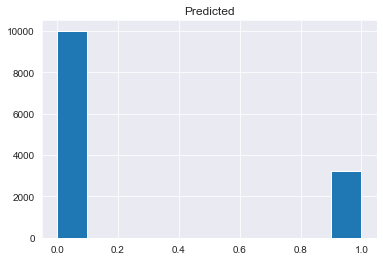

In [ ]:
submit_result.hist('Predicted')

In [ ]:
sub_groupped = submit_result.groupby('Id', as_index=False, sort=False).agg(lambda x: 1 if x.mean() > 0.25 else 0)
sub_groupped

,Id,Predicted
0,6107424960806386948,0
1,-1808613790090531322,0
2,-2649749947427248381,1
3,4684257435812939224,1
4,-7030158396775705152,0
...,...,...
3302,-2211304808281344572,0
3303,6416554621804862174,0
3304,-2318403417965670905,0
3305,-8008599329977273072,0


In [ ]:
# sub_groupped['Predicted'].apply(lambda s: print(type(s)))

array([[<AxesSubplot:title={'center':'Predicted'}>]], dtype=object)

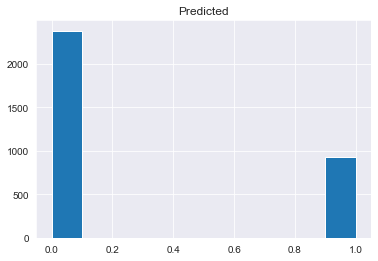

In [ ]:
sub_groupped.hist('Predicted')

In [ ]:
sub_groupped.to_csv('Submit.csv', index=False)